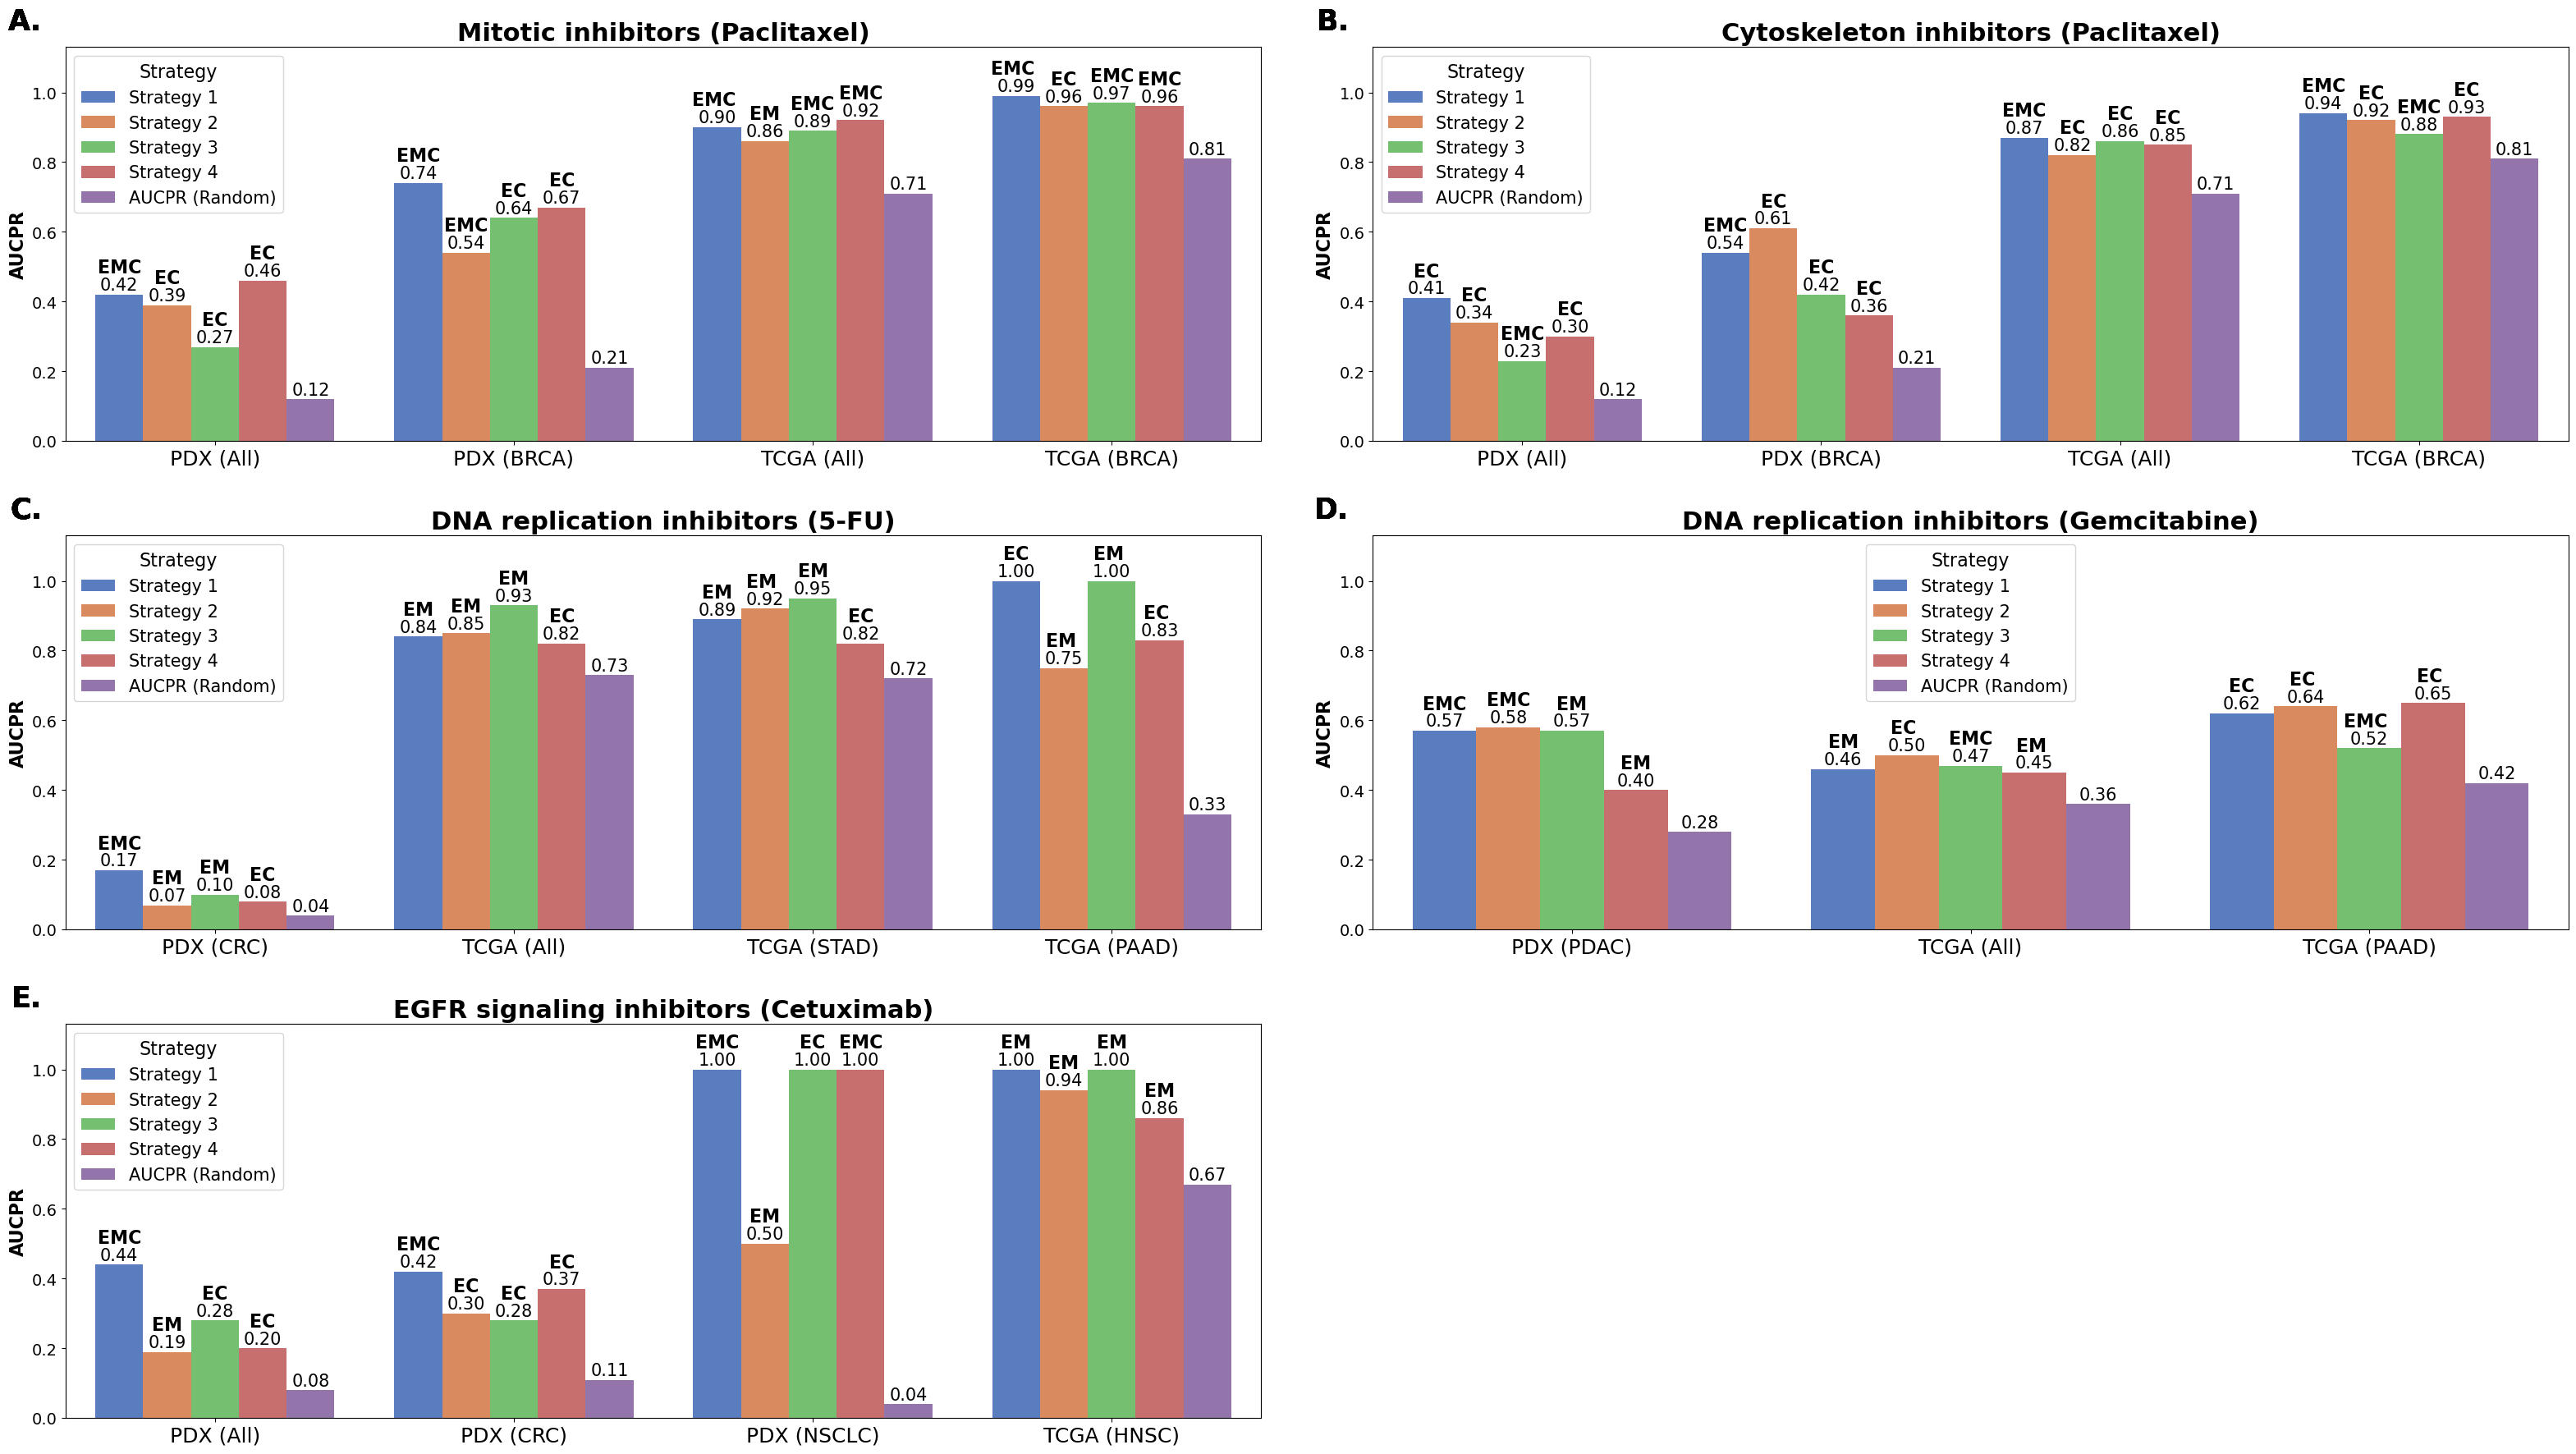

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Load the data
file_path = '/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Tables/Table_3.xlsx'
data = pd.read_excel(file_path)

# Prepare the data
data['Dataset_Cohort'] = data['Test Dataset'] + ' (' + data['Cohort'] + ')'

# Melt the AUCPR columns for plotting
melted_data = pd.melt(
    data,
    id_vars=['Pathway', 'Dataset_Cohort', 'Best Model1', 'Label1', 'Best Model2', 'Label2','Best Model3', 'Label3','Best Model4','Label4'],
    value_vars=['AUCPR1', 'AUCPR2', 'AUCPR3', 'AUCPR4', 'AUCPR (Random)'],
    var_name='AUCPR_Type',
    value_name='AUCPR_Value'
)

# Create a new column for x-axis labels based on Best Model and AUCPR_Type
def get_model_label(row):
    if row['AUCPR_Type'] == 'AUCPR1':
        return row['Best Model1']
    elif row['AUCPR_Type'] == 'AUCPR2':
        return row['Best Model2']
    elif row['AUCPR_Type'] == 'AUCPR3':
        return row['Best Model3']
    elif row['AUCPR_Type'] == 'AUCPR4':
        return row['Best Model4']
    else:
        return 'AUCPR (Random)'

melted_data['Model_Label'] = melted_data.apply(get_model_label, axis=1)

# Set up the grid of plots
pathways = melted_data['Pathway'].unique()

custom_titles = {
    'Mitosis ': 'Mitotic inhibitors (Paclitaxel)',
    'Cytoskeleton': 'Cytoskeleton inhibitors (Paclitaxel)',
    'DNA replication1': 'DNA replication inhibitors (5-FU)',
    'DNA replication2': 'DNA replication inhibitors (Gemcitabine)',
    'EGFR signaling': 'EGFR signaling inhibitors (Cetuximab)'
}

# Define subplot labels 
subplot_labels = ['A.', 'B.', 'C.', 'D.', 'E.']

fig, axes = plt.subplots(3, 2, figsize=(32, 18), sharey=False)
axes = axes.flatten()

# Plot each pathway
for i, pathway in enumerate(pathways):
    ax = axes[i]
    subset = melted_data[melted_data['Pathway'] == pathway]
    sns.barplot(
        data=subset,
        x='Dataset_Cohort',
        y='AUCPR_Value',
        hue='Model_Label',
        ax=ax,
        palette='muted',
        dodge=True
    )

    ax.set_ylim(0, 1.13)
    
    # Annotate each bar with the corresponding AUCPR value
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', padding=1, fontsize=15)
    
    # Define a mapping of models to corresponding label columns (no label for 'Random')
    label_map = {
        'Strategy 1': 'Label1',
        'Strategy 2': 'Label2',
        'Strategy 3': 'Label3',
        'Strategy 4': 'Label4'
    }
    
    # Annotate the custom labels above the bars (skip 'Random')
    for bar, model_label, dataset_cohort in zip(ax.patches, subset['Model_Label'], subset['Dataset_Cohort']):
        if model_label == 'AUCPR (Random)':
            continue
        
        label_column = label_map.get(model_label)
        label_value = subset.loc[
            (subset['Model_Label'] == model_label) & 
            (subset['Dataset_Cohort'] == dataset_cohort), label_column
        ].values[0]
    
        bar_height = bar.get_height()
    
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar_height + 0.05,
            f'{label_value}',
            ha='center', va='bottom', fontsize=16, fontweight='bold'
        )
        
        # Add subplot label
        ax.text(
            -0.02, 1.1,  # Position slightly above the top-left corner
            subplot_labels[i],
            transform=ax.transAxes,
            fontsize=25, fontweight='bold', ha='right', va='top'
        )
    
    # Set axis labels
    ax.set_ylabel('AUCPR', fontsize=16, fontweight = "bold")
    ax.set_xlabel('')
    
    # Increase size of x- and y-axis values (tick labels)
    ax.tick_params(axis='y', labelsize=14)
    ax.tick_params(axis='x', labelsize=18)

    # Change the legend title to "Strategy"
    ax.legend(title='Strategy', title_fontsize=16, fontsize=15)

    # Set bold title
    ax.set_title(
        custom_titles[pathway],
        fontsize=22, fontweight='bold'
    )

# Hide the last empty subplot (since we only have 5 plots but a 3x2 grid)
fig.delaxes(axes[-1])

fig.subplots_adjust(wspace=8.4, hspace=3.6) 

# Adjust layout
plt.tight_layout()
plt.show()

# Save the combined figure
output_path = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/Figure 3.jpeg"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [2]:
pathways

array(['Mitosis ', 'Cytoskeleton', 'DNA replication1', 'DNA replication2',
       'EGFR signaling'], dtype=object)

In [3]:
melted_data["Pathway"].unique()

array(['Mitosis ', 'Cytoskeleton', 'DNA replication1', 'DNA replication2',
       'EGFR signaling'], dtype=object)

In [4]:
subset

,Pathway,Dataset_Cohort,Best Model1,Label1,Best Model2,Label2,Best Model3,Label3,Best Model4,Label4,AUCPR_Type,AUCPR_Value,Model_Label
15,EGFR signaling,PDX (All),Strategy 1,EMC,Strategy 2,EM,Strategy 3,EC,Strategy 4,EC,AUCPR1,0.44,Strategy 1
16,EGFR signaling,PDX (CRC),Strategy 1,EMC,Strategy 2,EC,Strategy 3,EC,Strategy 4,EC,AUCPR1,0.42,Strategy 1
17,EGFR signaling,PDX (NSCLC),Strategy 1,EMC,Strategy 2,EM,Strategy 3,EC,Strategy 4,EMC,AUCPR1,1.00,Strategy 1
18,EGFR signaling,TCGA (HNSC),Strategy 1,EM,Strategy 2,EM,Strategy 3,EM,Strategy 4,EM,AUCPR1,1.00,Strategy 1
34,EGFR signaling,PDX (All),Strategy 1,EMC,Strategy 2,EM,Strategy 3,EC,Strategy 4,EC,AUCPR2,0.19,Strategy 2
35,EGFR signaling,PDX (CRC),Strategy 1,EMC,Strategy 2,EC,Strategy 3,EC,Strategy 4,EC,AUCPR2,0.30,Strategy 2
36,EGFR signaling,PDX (NSCLC),Strategy 1,EMC,Strategy 2,EM,Strategy 3,EC,Strategy 4,EMC,AUCPR2,0.50,Strategy 2
37,EGFR signaling,TCGA (HNSC),Strategy 1,EM,Strategy 2,EM,Strategy 3,EM,Strategy 4,EM,AUCPR2,0.94,Strategy 2
53,EGFR signaling,PDX (All),Strategy 1,EMC,Strategy 2,EM,Strategy 3,EC,Strategy 4,EC,AUCPR3,0.28,Strategy 3
54,EGFR signaling,PDX (CRC),Strategy 1,EMC,Strategy 2,EC,Strategy 3,EC,Strategy 4,EC,AUCPR3,0.28,Strategy 3


In [5]:
## 1. mitosis

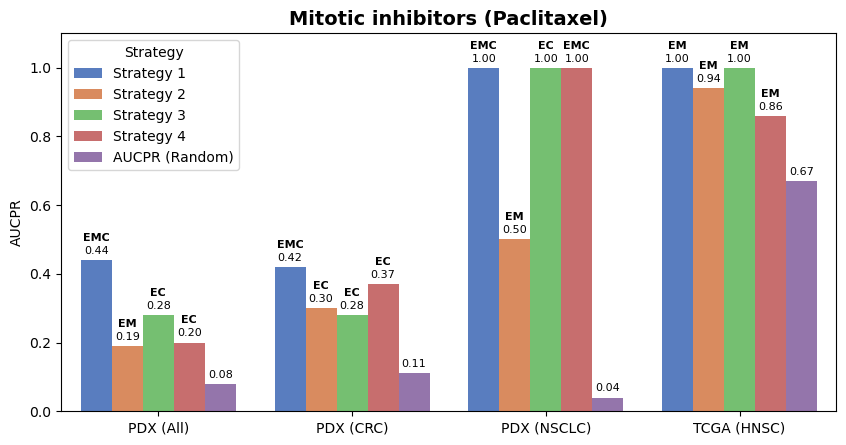

In [6]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the Seaborn bar plot inside the figure
sns.barplot(
    data=subset,
    x='Dataset_Cohort',
    y='AUCPR_Value',
    hue='Model_Label',
    palette='muted',
    dodge=True, 
    ax=ax  # Assign to the subplot axis
)

ax.set_ylim(0, 1.10)

# Annotate each bar with the corresponding AUCPR value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)

# Define a mapping of models to corresponding label columns (no label for 'Random')
label_map = {
    'Strategy 1': 'Label1',
    'Strategy 2': 'Label2',
    'Strategy 3': 'Label3',
    'Strategy 4': 'Label4'
}

# Annotate the custom labels above the bars (skip 'Random')
for bar, model_label, dataset_cohort in zip(ax.patches, subset['Model_Label'], subset['Dataset_Cohort']):
    if model_label == 'AUCPR (Random)':
        continue
    
    label_column = label_map.get(model_label)
    label_value = subset.loc[
        (subset['Model_Label'] == model_label) & 
        (subset['Dataset_Cohort'] == dataset_cohort), label_column
    ].values[0]

    bar_height = bar.get_height()

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.05,
        f'{label_value}',
        ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

# Adjust layout to ensure labels fit
plt.subplots_adjust(bottom=0.25)

# Set axis labels
ax.set_ylabel('AUCPR')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Change the legend title to "Strategy"
ax.legend(title='Strategy')

# Set bold title
ax.set_title(
    'Mitotic inhibitors (Paclitaxel)',
    fontsize=14, fontweight='bold'
)

# Save the plot
output_path = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/Mitosis_strategies.jpeg"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Store the figure object in a variable
mitosis_plot = fig

In [7]:
## 2. Cytoskeleton

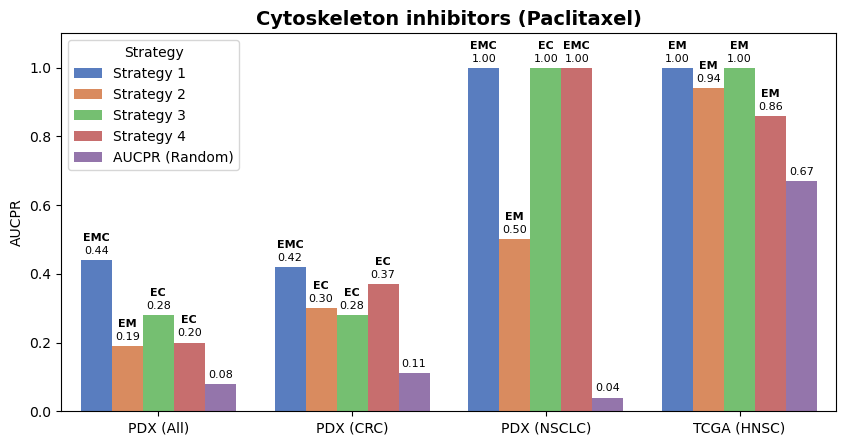

In [8]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the Seaborn bar plot inside the figure
sns.barplot(
    data=subset,
    x='Dataset_Cohort',
    y='AUCPR_Value',
    hue='Model_Label',
    palette='muted',
    dodge=True, 
    ax=ax  # Assign to the subplot axis
)

ax.set_ylim(0, 1.10)

# Annotate each bar with the corresponding AUCPR value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)

# Define a mapping of models to corresponding label columns (no label for 'Random')
label_map = {
    'Strategy 1': 'Label1',
    'Strategy 2': 'Label2',
    'Strategy 3': 'Label3',
    'Strategy 4': 'Label4'
}

# Annotate the custom labels above the bars (skip 'Random')
for bar, model_label, dataset_cohort in zip(ax.patches, subset['Model_Label'], subset['Dataset_Cohort']):
    if model_label == 'AUCPR (Random)':
        continue
    
    label_column = label_map.get(model_label)
    label_value = subset.loc[
        (subset['Model_Label'] == model_label) & 
        (subset['Dataset_Cohort'] == dataset_cohort), label_column
    ].values[0]

    bar_height = bar.get_height()

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.05,
        f'{label_value}',
        ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

# Adjust layout to ensure labels fit
plt.subplots_adjust(bottom=0.25)

# Set axis labels
ax.set_ylabel('AUCPR')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Change the legend title to "Strategy"
ax.legend(title='Strategy')

# Set bold title
ax.set_title(
    'Cytoskeleton inhibitors (Paclitaxel)',
    fontsize=14, fontweight='bold'
)

# Save the plot
output_path = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/Cytoskeleton_strategies.jpeg"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Store the figure object in a variable
cytoskeleton_plot = fig

In [9]:
## 3. DNA replication (5-FU)

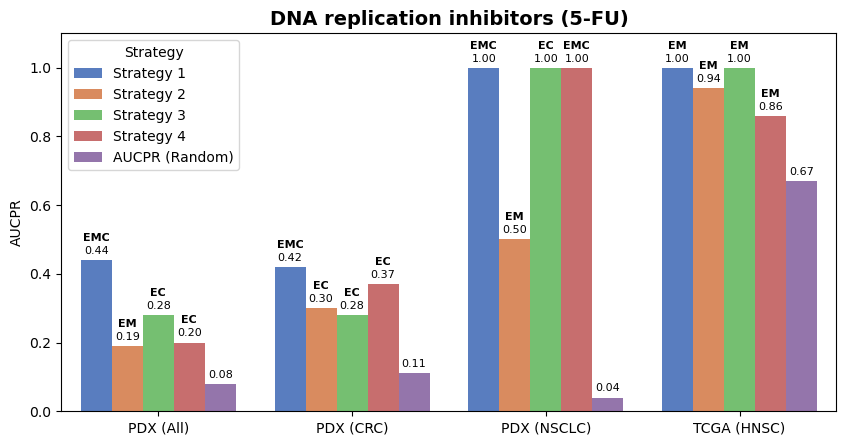

In [10]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the Seaborn bar plot inside the figure
sns.barplot(
    data=subset,
    x='Dataset_Cohort',
    y='AUCPR_Value',
    hue='Model_Label',
    palette='muted',
    dodge=True, 
    ax=ax  # Assign to the subplot axis
)

ax.set_ylim(0, 1.10)

# Annotate each bar with the corresponding AUCPR value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)

# Define a mapping of models to corresponding label columns (no label for 'Random')
label_map = {
    'Strategy 1': 'Label1',
    'Strategy 2': 'Label2',
    'Strategy 3': 'Label3',
    'Strategy 4': 'Label4'
}

# Annotate the custom labels above the bars (skip 'Random')
for bar, model_label, dataset_cohort in zip(ax.patches, subset['Model_Label'], subset['Dataset_Cohort']):
    if model_label == 'AUCPR (Random)':
        continue
    
    label_column = label_map.get(model_label)
    label_value = subset.loc[
        (subset['Model_Label'] == model_label) & 
        (subset['Dataset_Cohort'] == dataset_cohort), label_column
    ].values[0]

    bar_height = bar.get_height()

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.05,
        f'{label_value}',
        ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

# Adjust layout to ensure labels fit
plt.subplots_adjust(bottom=0.25)

# Set axis labels
ax.set_ylabel('AUCPR')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Change the legend title to "Strategy"
ax.legend(title='Strategy')

# Set bold title
ax.set_title(
    'DNA replication inhibitors (5-FU)',
    fontsize=14, fontweight='bold'
)

# Save the plot
output_path = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/DNA_Replication_5_FU_strategies.jpeg"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Store the figure object in a variable
dna_rep_flu_plot = fig

In [11]:
## 4. DNA replication (Gemcitabine)

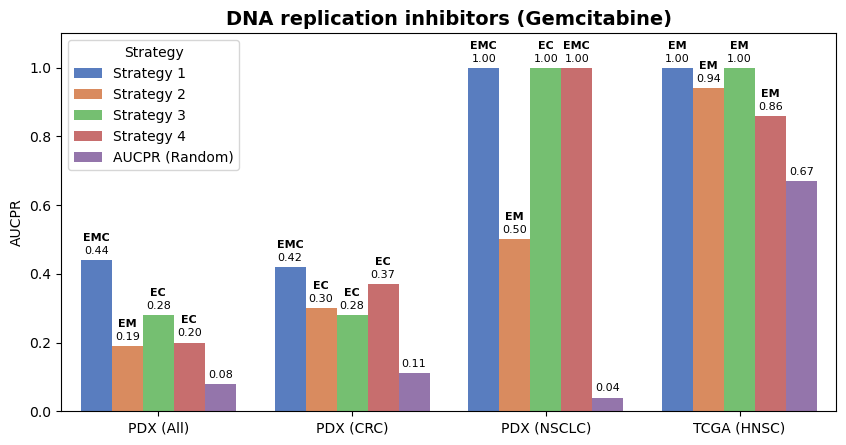

In [12]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the Seaborn bar plot inside the figure
sns.barplot(
    data=subset,
    x='Dataset_Cohort',
    y='AUCPR_Value',
    hue='Model_Label',
    palette='muted',
    dodge=True, 
    ax=ax  # Assign to the subplot axis
)

ax.set_ylim(0, 1.10)

# Annotate each bar with the corresponding AUCPR value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)

# Define a mapping of models to corresponding label columns (no label for 'Random')
label_map = {
    'Strategy 1': 'Label1',
    'Strategy 2': 'Label2',
    'Strategy 3': 'Label3',
    'Strategy 4': 'Label4'
}

# Annotate the custom labels above the bars (skip 'Random')
for bar, model_label, dataset_cohort in zip(ax.patches, subset['Model_Label'], subset['Dataset_Cohort']):
    if model_label == 'AUCPR (Random)':
        continue
    
    label_column = label_map.get(model_label)
    label_value = subset.loc[
        (subset['Model_Label'] == model_label) & 
        (subset['Dataset_Cohort'] == dataset_cohort), label_column
    ].values[0]

    bar_height = bar.get_height()

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.05,
        f'{label_value}',
        ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

# Adjust layout to ensure labels fit
plt.subplots_adjust(bottom=0.25)

# Set axis labels
ax.set_ylabel('AUCPR')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Change the legend title to "Strategy"
ax.legend(title='Strategy')

# Set bold title
ax.set_title(
    'DNA replication inhibitors (Gemcitabine)',
    fontsize=14, fontweight='bold'
)

# Save the plot
output_path = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/DNA_Replication_Gemcitabine_strategies.jpeg"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# Store the figure object in a variable
dna_rep_gem_plot = fig

In [13]:
## 4. EGFR signaling

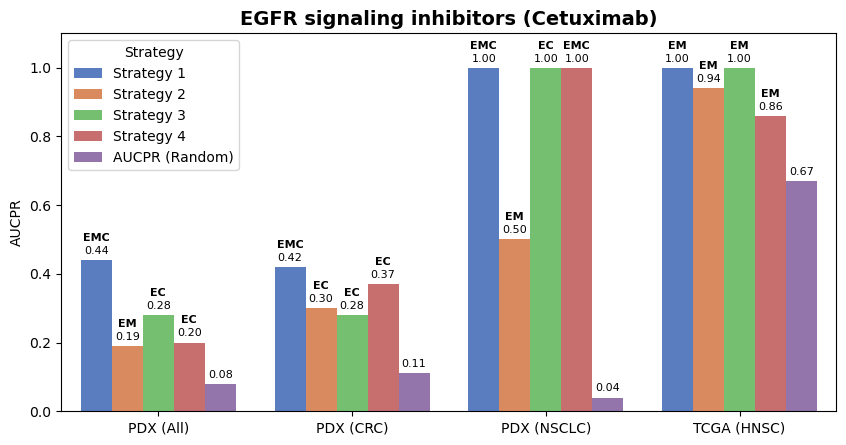

In [14]:
# Create a new figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create the Seaborn bar plot inside the figure
sns.barplot(
    data=subset,
    x='Dataset_Cohort',
    y='AUCPR_Value',
    hue='Model_Label',
    palette='muted',
    dodge=True, 
    ax=ax  # Assign the subplot axis
)

ax.set_ylim(0, 1.10)

# Annotate each bar with the corresponding AUCPR value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)

# Define a mapping of models to corresponding label columns (no label for 'Random')
label_map = {
    'Strategy 1': 'Label1',
    'Strategy 2': 'Label2',
    'Strategy 3': 'Label3',
    'Strategy 4': 'Label4'
}

# Annotate the custom labels above the bars (skip 'Random')
for bar, model_label, dataset_cohort in zip(ax.patches, subset['Model_Label'], subset['Dataset_Cohort']):
    if model_label == 'AUCPR (Random)':
        continue
    
    label_column = label_map.get(model_label)
    label_value = subset.loc[
        (subset['Model_Label'] == model_label) & 
        (subset['Dataset_Cohort'] == dataset_cohort), label_column
    ].values[0]

    bar_height = bar.get_height()

    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar_height + 0.05,
        f'{label_value}',
        ha='center', va='bottom', fontsize=8, fontweight='bold'
    )

# Adjust layout to ensure labels fit
plt.subplots_adjust(bottom=0.25)

# Set axis labels
ax.set_ylabel('AUCPR')
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Change the legend title to "Strategy"
ax.legend(title='Strategy')

# Set bold title
ax.set_title(
    'EGFR signaling inhibitors (Cetuximab)',
    fontsize=14, fontweight='bold'
)

# Save the plot
output_path = "/Users/semihalpsoy/Desktop/Paper_Drug_Resistance_Mechanisms/Figures/EGFR_Signaling_strategies.jpeg"
fig.savefig(output_path, dpi=300, bbox_inches='tight')

# ✅ Correctly store the figure object in a variable
egfr_plot = fig  # ✅ Keep this! Do not overwrite below

# Show the plot
egfr_plot.show()